In [13]:
import numpy as np
import pandas as pd
df=pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [14]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df.ix[:,4]=le.fit_transform(df.ix[:,4])

In [16]:
def name_classifier(name_df):    
    name_class_df = pd.DataFrame(columns=['miss','mrs','master','mr'])
    
    for name in name_df:        
        if 'Miss.' in name:
            df = pd.DataFrame([[1,0,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Mrs.' in name:
            df = pd.DataFrame([[0,1,0,0]],columns=['miss','mrs','master','mr'])
        elif 'Master.' in name:
            df = pd.DataFrame([[0,0,1,0]],columns=['miss','mrs','master','mr'])
        elif 'Mr.' in name:
            df = pd.DataFrame([[0,0,0,1]],columns=['miss','mrs','master','mr'])
        else :
            df = pd.DataFrame([[0,0,0,0]],columns=['miss','mrs','master','mr'])
        name_class_df = name_class_df.append(df,ignore_index=True)        
    return name_class_df

In [17]:
ss=name_classifier(df["Name"])
#ss=pd.DataFrame(ss.values,index=range(1,892),columns=["miss","mrs","master","mr"])
df=pd.merge(df,ss,right_index=True,left_index=True)

In [18]:
def sum_maker(x,y):
    sums=pd.DataFrame(columns=["SUM"])
    for i in range(len(x)):
        s=pd.DataFrame([int(x[i])+int(y[i])],columns=["SUM"])
        sums=sums.append(s,ignore_index=True)
    return sums

In [19]:
sums=sum_maker(df["SibSp"].values,df["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(891),columns=["SUM"])
df=pd.merge(df,sums,right_index=True,left_index=True)

In [20]:
def name(x):
    namesum1=[]
    namesum={}
    namesum2=[]
    for i in range(len(x)):
        name=x[i].split(",")
        if name[0] in namesum1:
            namesum1.append(name[0])
            namesum[name[0]]+=1
        else:
            namesum[name[0]]=1
            namesum1.append(name[0])
    for p in range(len(namesum1)):
        namesum2.append([namesum1[p],namesum[namesum1[p]]])
    namesum3=pd.DataFrame(namesum2,index=range(len(namesum1)),columns=["myoji","namesum"])
    return namesum3

In [21]:
namesum=name(df["Name"])
df=pd.merge(df,namesum,right_index=True,left_index=True)

In [22]:
s=pd.get_dummies(df["Embarked"])
df=pd.merge(df,s,left_index=True,right_index=True)

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,miss,mrs,master,mr,SUM,myoji,namesum,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,1.0,1.0,Braund,2,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,0.0,1.0,0.0,0.0,1.0,Cumings,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,0.0,0.0,Heikkinen,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,0.0,1.0,0.0,0.0,1.0,Futrelle,2,0,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,0.0,0.0,0.0,1.0,0.0,Allen,2,0,0,1
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,...,0.0,0.0,0.0,1.0,0.0,Moran,3,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,...,0.0,0.0,0.0,1.0,0.0,McCarthy,1,0,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,...,0.0,0.0,1.0,0.0,4.0,Palsson,4,0,0,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,...,0.0,1.0,0.0,0.0,2.0,Johnson,6,0,0,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,...,0.0,1.0,0.0,0.0,1.0,Nasser,2,1,0,0


In [24]:
df2 = df
df = df2.iloc[:,[2,4,5,6,7,9,12,13,14,15,16,18,19,20,21]]

In [25]:
from sklearn.preprocessing import Imputer
imr1=Imputer(missing_values="NaN",strategy="median",axis=0)
imr2=Imputer(missing_values="NaN",strategy="median",axis=0)
imr3=Imputer(missing_values="NaN",strategy="median",axis=0)
imr4=Imputer(missing_values="NaN",strategy="median",axis=0)

df[df["miss"]==1]=imr1.fit_transform(df[df["miss"]==1])
df[df["mr"]==1]=imr2.fit_transform(df[df["mr"]==1])
df[df["mrs"]==1]=imr3.fit_transform(df[df["mrs"]==1])
df[df["master"]==1]=imr4.fit_transform(df[df["master"]==1])

C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\User\Documents\anaconda\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\User\Documents\anaconda\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [26]:
imr=Imputer(missing_values="NaN",strategy="median",axis=0)
imr.fit(df)
df=pd.DataFrame(imr.transform(df),columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mrs","master","mr","SUM","namesum","C","Q","S"])

In [28]:
y=df2.iloc[:,1]
x=df
y

0      0
1      1
2      1
3      1
4      0
5      0
6      0
7      0
8      1
9      1
10     1
11     1
12     0
13     0
14     0
15     1
16     0
17     1
18     0
19     1
20     0
21     1
22     1
23     1
24     0
25     1
26     0
27     0
28     1
29     0
      ..
861    0
862    1
863    0
864    0
865    1
866    1
867    0
868    0
869    1
870    0
871    1
872    0
873    0
874    1
875    1
876    0
877    0
878    0
879    1
880    1
881    0
882    0
883    0
884    0
885    0
886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

In [29]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc1=StandardScaler()
sc2=StandardScaler()
sc3=StandardScaler()
sc4=StandardScaler()
x["Fare"]= sc1.fit_transform(x["Fare"])
x["SibSp"]=sc2.fit_transform(x["SibSp"])
x["Parch"]=sc3.fit_transform(x["Parch"])
x["Age"]=sc4.fit_transform(x["Age"])

In [30]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3.0,1.0,22.0,1.0,0.0,7.2500,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0
1,1.0,0.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
2,3.0,0.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,35.0,1.0,0.0,53.1000,0.0,1.0,0.0,0.0,1.0,2.0,0.0,0.0,1.0
4,3.0,1.0,35.0,0.0,0.0,8.0500,0.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,1.0
5,3.0,1.0,30.0,0.0,0.0,8.4583,0.0,0.0,0.0,1.0,0.0,3.0,0.0,1.0,0.0
6,1.0,1.0,54.0,0.0,0.0,51.8625,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
7,3.0,1.0,2.0,3.0,1.0,21.0750,0.0,0.0,1.0,0.0,4.0,4.0,0.0,0.0,1.0
8,3.0,0.0,27.0,0.0,2.0,11.1333,0.0,1.0,0.0,0.0,2.0,6.0,0.0,0.0,1.0
9,2.0,0.0,14.0,1.0,0.0,30.0708,0.0,1.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0


In [38]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [40]:
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import accuracy_score
depth_ls = [3,5,7,9,12,15,17]
sub_sample_ls = [0.6,0.7,0.8,0.9,1]
params = {"max_depth":depth_ls,"subsample":sub_sample_ls}
gs = GridSearchCV(estimator=gbm,param_grid=params,n_jobs=-1)
gs.fit(x_train,y_train)
print(accuracy_score(y_true=y_train,y_pred=gs.predict(x_train)))
print(accuracy_score(y_true=y_test,y_pred=gs.predict(x_test)))

0.916532905297
0.828358208955


In [44]:
df3=pd.read_csv("test.csv")
#df3.columns=["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
#df3=df3.ix[1:,:]
ss=name_classifier(df3["Name"])
ss=pd.DataFrame(ss.values,index=range(418),columns=["miss","mrs","master","mr"])
df4=pd.merge(df3,ss,right_index=True,left_index=True)
sums=sum_maker(df4["SibSp"].values,df4["Parch"].values)
sums=pd.DataFrame(sums.values,index=range(418),columns=["SUM"])
df4=pd.merge(df4,sums,right_index=True,left_index=True)
namesums=name(df4["Name"])
df4=pd.merge(df4,namesums,right_index=True,left_index=True)
df4["Sex"]=le.transform(df4["Sex"])
s1=pd.get_dummies(df4["Embarked"])
df4=pd.merge(df4,s1,right_index=True,left_index=True)
df4=df4.ix[:,[1,3,4,5,6,8,11,12,13,14,15,17,18,19,20]]
df4[df4["miss"]==1]=imr1.transform(df4[df4["miss"]==1])
df4[df4["mr"]==1]=imr2.transform(df4[df4["mr"]==1])
df4[df4["mrs"]==1]=imr3.transform(df4[df4["mrs"]==1])
df4[df4["master"]==1]=imr1.transform(df4[df4["master"]==1])
df4=pd.DataFrame(imr.transform(df4),columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mrs","master","mr","SUM","namesum","C","Q","S"])
#pd.DataFrame(a)
x_te=df4
#x_te.columns=["Pclass","Sex","Age","SibSp","Parch","Fare","miss","mr","mrs","master","SUM","C","Q","S"]
x_te

,Pclass,Sex,Age,SibSp,Parch,Fare,miss,mrs,master,mr,SUM,namesum,C,Q,S
0,3.0,1.0,34.5,0.0,0.0,7.8292,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,0.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,1.0
5,3.0,1.0,14.0,0.0,0.0,9.2250,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
6,3.0,0.0,30.0,0.0,0.0,7.6292,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7,2.0,1.0,26.0,1.0,1.0,29.0000,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,1.0
8,3.0,0.0,18.0,0.0,0.0,7.2292,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9,3.0,1.0,21.0,2.0,0.0,24.1500,0.0,0.0,0.0,1.0,2.0,4.0,0.0,0.0,1.0


In [45]:
x_te.isnull().sum()

Pclass     0
Sex        0
Age        0
SibSp      0
Parch      0
Fare       0
miss       0
mrs        0
master     0
mr         0
SUM        0
namesum    0
C          0
Q          0
S          0
dtype: int64

In [46]:
y_pred=gs.predict(x_te)
len(y_pred)

418

In [48]:
zip_data = zip(df3.ix[:,0].astype(int), y_pred.astype(int))
predict_data = list(zip_data)
import csv
with open("predcit_result_data.csv","w") as f:
    writer = csv.writer(f, lineterminator='\n')
    writer.writerow(["PassengerId", "Survived"])
    for pid, survived in zip(df3.ix[:,0].astype(int), y_pred.astype(int)):
        writer.writerow([pid, survived])

## メモ

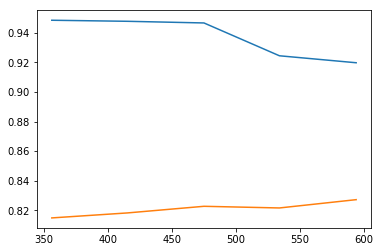

In [51]:
%matplotlib inline
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
training_sizes, train_scores, test_scores = \
    learning_curve(gs,x,y,scoring="accuracy", train_sizes = [0.6,0.7,0.8,0.9,1.0],n_jobs=-1)
plt.plot(training_sizes,train_scores.mean(axis=1),label="training_scores")
plt.plot(training_sizes,test_scores.mean(axis=1),label="test_scores")
plt.show()